# 분류 알고리즘 성능 비교 (이진분류)

In [3]:
# 이진 분류를 위한 데이터세트 준비
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, Y = cancer['data'], cancer['target']

# Train Test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [4]:
# 분류 알고리즘 생성 및 예측
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC #SVM
from sklearn.neural_network import MLPClassifier 

knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

lr = LogisticRegression(max_iter=10000).fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

dtc = DecisionTreeClassifier(max_depth=3).fit(X_train, Y_train)
dtc_pred = dtc.predict(X_test)

rfc = RandomForestClassifier(max_depth=3).fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

gbc = GradientBoostingClassifier(max_depth=3).fit(X_train, Y_train)
gbc_pred = gbc.predict(X_test)

svm = SVC().fit(X_train, Y_train)
svm_pred = svm.predict(X_test)

mlp = MLPClassifier().fit(X_train, Y_train)
mlp_pred = mlp.predict(X_test)

In [5]:
# 모델별 정확도 (accuracy) 출력
print('KNN 정확도 : %.2f%%' % (knn.score(X_test, Y_test) * 100))
print('Logistic Regression 정확도 : %.2f%%' % (lr.score(X_test, Y_test) * 100))
print('Decision Tree 정확도 : %.2f%%' % (dtc.score(X_test, Y_test) * 100))
print('Random Forest 정확도 : %.2f%%' % (rfc.score(X_test, Y_test) * 100))
print('Gradient Boosting 정확도 : %.2f%%' % (gbc.score(X_test, Y_test) * 100))
print('SVM 정확도 : %.2f%%' % (svm.score(X_test, Y_test) * 100))
print('MLP 정확도 : %.2f%%' % (mlp.score(X_test, Y_test) * 100))

KNN 정확도 : 95.10%
Logistic Regression 정확도 : 95.80%
Decision Tree 정확도 : 91.61%
Random Forest 정확도 : 96.50%
Gradient Boosting 정확도 : 97.90%
SVM 정확도 : 95.80%
MLP 정확도 : 91.61%


In [6]:
# ROC Curve를 위한 fpr 및 tpr 계산
from sklearn.metrics import roc_curve
# 평가(metric) : 실제값, 예측값 순서대로 넣어주면 된다

fpr, tpr, thresholds = roc_curve(Y_test, knn_pred) # 실제값 예측값
# 양끝 0, 1은 그래프를 그릴수 있도록 도와주는 값
fpr, tpr, thresholds

(array([0.        , 0.10638298, 1.        ]),
 array([0.        , 0.97916667, 1.        ]),
 array([2, 1, 0]))

In [7]:
# AUC 계산
from sklearn.metrics import auc
knn_auc = auc(fpr, tpr) # RoC Curve를 그리는 요소인 fpr, tpr
knn_auc

0.9363918439716311

In [8]:
# Roc Curve 시각화
import matplotlib.pyplot as plt
label = "KNN (AUC : %.2f)" % knn_auc 
plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")
plt.plot(fpr, tpr, label=label)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer Classification Model Compare')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

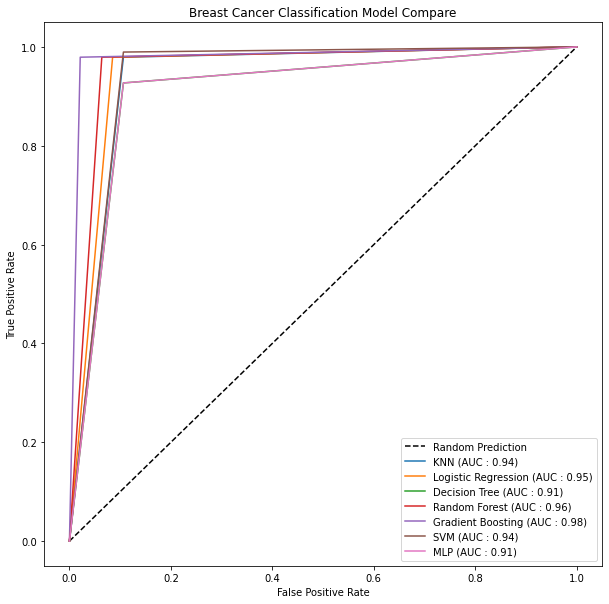

In [9]:
# 분류 알고리즘 ROC Curve 시각화
plt.figure(figsize=(10,10))

plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")

alogs = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 
        'Gradient Boosting','SVM', 'MLP']
preds = [knn_pred, lr_pred, dtc_pred, rfc_pred, gbc_pred, svm_pred, mlp_pred]

for alog, pred in zip(alogs, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    roc_auc = auc(fpr, tpr)
    label = "%s (AUC : %.2f)" % (alog, roc_auc)
    plt.plot(fpr, tpr, label=label)
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer Classification Model Compare')
plt.legend()
plt.show()

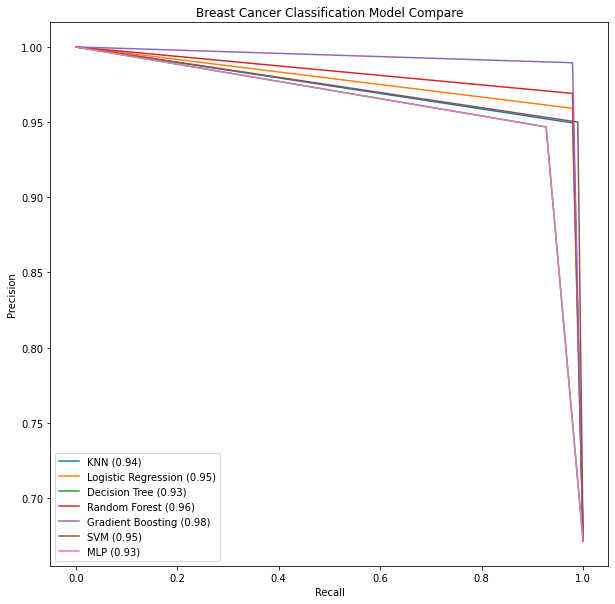

In [10]:
# 분류 알고리즘 precision recall curve 시각화
# 둘다 높을 수록 좋다. 우상단을 보면 된다. 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

plt.figure(figsize=(10,10))

alogs = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 
        'Gradient Boosting','SVM', 'MLP']
preds = [knn_pred, lr_pred, dtc_pred, rfc_pred, gbc_pred, svm_pred, mlp_pred]

for alog, pred in zip(alogs, preds):
    precision, recall, thresholds = precision_recall_curve(Y_test, pred)
    aps = average_precision_score(Y_test, pred)
    label = "%s (%.2f)" % (alog, aps)
    plt.plot(recall, precision, label=label)
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Breast Cancer Classification Model Compare')
plt.legend()
plt.show()

### precision recall curve 예시

- 범주별 데이터 갯수가 불균등할 때 사용

In [11]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# 2진 분류를 위한 데이터 조절
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [12]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.88


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.88')

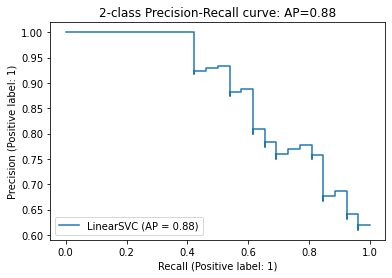

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

# 분류기가 들어감 -> 분류 임계값을 변경하면서 어디가 좋은지 판단하겠다. 
# 실제값을 잘 분류하는게 중요하느냐? 모델 예측하는게 중요한가? 를 선택하기 위해 사용
disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))


In [14]:
# Confusion Matrix (Multi Class)
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [15]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["bird", "cat", "ant"])

array([[0, 1, 0],
       [0, 2, 1],
       [0, 0, 2]])

In [16]:
y_true = [0, 1, 0, 1]
y_pred = [1, 1, 1, 0]

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() 
tn, fp, fn, tp

(0, 2, 1, 1)

# 혼동행렬(Confusion Matrix)을 기반으로하는 평가 지표

In [17]:
# Sensitivity, Recall, Hit Rate, True Positive Rate -> 도메인별로 부르는 이름이 다름 
TPR = tp / (tp + fn)
print('True Pisitive Rate', TPR)

# Specificity, Selectivity, True Negative Rate
TNR = tn / (tn + fp)
print('True Negative Rate', TNR)

# Precision, Positive Predictive Value (이상감지에서 활용)
PPV = tp / (tp + fp)
print('Positive Predictive Value', PPV)

# Negative Predictive Value
NPV = tn / (tn + fn)
print('Negative Predictive Value', NPV)

True Pisitive Rate 0.5
True Negative Rate 0.0
Positive Predictive Value 0.3333333333333333
Negative Predictive Value 0.0


In [18]:
# Threat Score, Critical Success Index (위협점수)
TS = tp / (tp + fn+ fp)
print('Threat Score', TS)

# Accuracy
ACC = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy', ACC)

# Balanced Accuracy (불균형 문제를 해결하기 위한 방법)
BA = (TPR + TNR) / 2
print('Balanced Accuracy', BA)

# F1 Score (조화평균)
F1 = (2 * tp) / (2 * tp + fp + fn)
print('F1 Score', F1)

Threat Score 0.25
Accuracy 0.25
Balanced Accuracy 0.25
F1 Score 0.4


In [19]:
from sklearn.metrics import classification_report  

# support : 데이터 갯수
# macro avg : 일반 평균 
# weighted avg : 갯수 반영한 가중 평균 
# 다항일 때는 0,1,2,3,... 
print(classification_report(Y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        47
           1       0.99      0.98      0.98        96

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [20]:
from sklearn.datasets import load_boston
boston = load_boston()

from sklearn.linear_model import Ridge
ridge = Ridge().fit(boston['data'], boston['target'])
pred = ridge.predict(boston['data'])

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

print('Mean Squared Error :', mse(boston['target'], pred))
print('Mean Absolute Error :', mae(boston['target'], pred))
print('Root Mean Squared Error :', mse(boston['target'], pred) ** 0.5)

Mean Squared Error : 22.044452243088195
Mean Absolute Error : 3.2645739551644364
Root Mean Squared Error : 4.695151993608747


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

##  scikit-learn에서 제공하는 평가 관련 API는 아래에서 확인 가능
> https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

## scikit-learn에서 제공하는 모델 선택 및 평가 관련 API는 아래 링크에서 확인 가능
> https://scikit-learn.org/stable/model_selection.html#model-selection

## 기타 scikit-learn 예제는 아래 링크에서 확인 가능
> https://scikit-learn.org/stable/auto_examples/index.html